In [1]:
from __future__ import print_function 
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual 
from IPython.core.display import display, HTML


import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sb
import squarify 
import folium as fl


%matplotlib inline

In [2]:
covid_vacc = pd.read_csv('C:/Users/laxmi/OneDrive/M.Tech/S4/covid/country_vaccinations.csv')
covid_vacc.columns

Index(['country', 'iso_code', 'date', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated',
       'daily_vaccinations_raw', 'daily_vaccinations',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'daily_vaccinations_per_million',
       'vaccines', 'source_name', 'source_website'],
      dtype='object')

In [3]:
covid_vacc

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,22-02-2021,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
1,Afghanistan,AFG,23-02-2021,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
2,Afghanistan,AFG,24-02-2021,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
3,Afghanistan,AFG,25-02-2021,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
4,Afghanistan,AFG,26-02-2021,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7612,Zimbabwe,ZWE,17-03-2021,39607.0,39607.0,NaN,57.0,529.0,0.27,0.27,NaN,36.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1373715027...
7613,Zimbabwe,ZWE,18-03-2021,40002.0,40002.0,NaN,395.0,569.0,0.27,0.27,NaN,38.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1373715027...
7614,Zimbabwe,ZWE,19-03-2021,41687.0,41687.0,NaN,1685.0,772.0,0.28,0.28,NaN,52.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1373715027...
7615,Zimbabwe,ZWE,20-03-2021,42210.0,42210.0,NaN,523.0,836.0,0.28,0.28,NaN,56.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1373715027...


In [4]:
#Dropping irrelevant fields like "source name" and "source website"
covid_vacc.drop(['source_name', 'source_website'], axis = 1, inplace = True)

In [5]:
#Removing null values from the dataset
covid_vacc.isnull().sum(axis = 0 )

country                                   0
iso_code                                  0
date                                      0
total_vaccinations                     2912
people_vaccinated                      3425
people_fully_vaccinated                4778
daily_vaccinations_raw                 3656
daily_vaccinations                      187
total_vaccinations_per_hundred         2912
people_vaccinated_per_hundred          3425
people_fully_vaccinated_per_hundred    4778
daily_vaccinations_per_million          187
vaccines                                  0
dtype: int64

In [6]:
#To find the unique countries where vaccines are given
vacc_countries = covid_vacc['country'].unique()
vacc_countries

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Bermuda', 'Bolivia',
       'Brazil', 'Bulgaria', 'Cambodia', 'Canada', 'Cayman Islands',
       'Chile', 'China', 'Colombia', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cyprus', 'Czechia', 'Denmark', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'England',
       'Equatorial Guinea', 'Estonia', 'Faeroe Islands',
       'Falkland Islands', 'Finland', 'France', 'Germany', 'Ghana',
       'Gibraltar', 'Greece', 'Greenland', 'Grenada', 'Guatemala',
       'Guernsey', 'Guinea', 'Guyana', 'Honduras', 'Hong Kong', 'Hungary',
       'Iceland', 'India', 'Indonesia', 'Iran', 'Ireland', 'Isle of Man',
       'Israel', 'Italy', 'Jamaica', 'Japan', 'Jersey', 'Jordan',
       'Kazakhstan', 'Kenya', 'Kuwait', 'Laos

In [7]:
#Analysing the various vaccines applied in each country
d = {}
for i in covid_vacc.values:
    d[i[0]] = d.get(i[0], [])
    if i[12] not in d[i[0]]:
        d[i[0]].append(i[12])
for i, j in d.items():
    print(i, " : ", j)

Afghanistan  :  ['Oxford/AstraZeneca']
Albania  :  ['Pfizer/BioNTech']
Algeria  :  ['Sputnik V']
Andorra  :  ['Pfizer/BioNTech']
Angola  :  ['Oxford/AstraZeneca']
Anguilla  :  ['Oxford/AstraZeneca']
Antigua and Barbuda  :  ['Oxford/AstraZeneca']
Argentina  :  ['Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V']
Australia  :  ['Oxford/AstraZeneca, Pfizer/BioNTech']
Austria  :  ['Moderna, Oxford/AstraZeneca, Pfizer/BioNTech']
Azerbaijan  :  ['Sinovac']
Bahamas  :  ['Oxford/AstraZeneca']
Bahrain  :  ['Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V']
Bangladesh  :  ['Oxford/AstraZeneca']
Barbados  :  ['Oxford/AstraZeneca']
Belarus  :  ['Sputnik V']
Belgium  :  ['Moderna, Oxford/AstraZeneca, Pfizer/BioNTech']
Belize  :  ['Oxford/AstraZeneca']
Bermuda  :  ['Pfizer/BioNTech']
Bolivia  :  ['Sputnik V']
Brazil  :  ['Oxford/AstraZeneca, Sinovac']
Bulgaria  :  ['Moderna, Oxford/AstraZeneca, Pfizer/BioNTech']
Cambodia  :  ['Sinopharm/Beijing']
Canada  :  ['Moderna, Oxford/AstraZ

In [8]:
# Top 10 countries with total vaccinations
total_vacc = covid_vacc[covid_vacc['date'] == '13-03-2021'].groupby(['country','iso_code','vaccines'])['total_vaccinations'].sum().reset_index()
top_10_countries = total_vacc[['country','vaccines','total_vaccinations']].sort_values('total_vaccinations', ascending=False).reset_index(drop=True).head(10)
pd.set_option('display.max_colwidth', 85)
display(top_10_countries)

,country,vaccines,total_vaccinations
0,United States,"Johnson&Johnson, Moderna, Pfizer/BioNTech",105703501.0
1,India,"Covaxin, Oxford/AstraZeneca",29738409.0
2,United Kingdom,"Oxford/AstraZeneca, Pfizer/BioNTech",25781120.0
3,England,"Oxford/AstraZeneca, Pfizer/BioNTech",21683887.0
4,Brazil,"Oxford/AstraZeneca, Sinovac",11362190.0
5,Turkey,Sinovac,10923284.0
6,Germany,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",9316687.0
7,Israel,"Moderna, Pfizer/BioNTech",9200208.0
8,Russia,"EpiVacCorona, Sputnik V",7639374.0
9,France,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",7292852.0


In [9]:
#Vaccines given on 13-03-2021
recent_date=covid_vacc[covid_vacc['date']=='13-03-2021']
vacc_ordered=recent_date['vaccines'].str.get_dummies(sep=', ').sum().sort_values(ascending=False)
print(vacc_ordered)


Oxford/AstraZeneca    77
Pfizer/BioNTech       72
Moderna               33
Sinopharm/Beijing     17
Sputnik V             15
Sinovac               13
Sinopharm/Wuhan        2
Johnson&Johnson        2
EpiVacCorona           1
Covaxin                1
dtype: int64


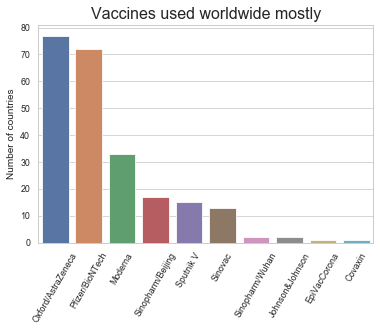

In [10]:
# Plot context, style and subplot
sb.set_style("whitegrid")
sb.set_context('paper')
f, ax = plt.subplots(1, 1)
# Seaborn bar plot customization
sb.barplot(x=vacc_ordered.index, y=vacc_ordered, palette='deep')
ax.set_title("Vaccines used worldwide mostly", fontsize=16)
ax.set_ylabel('Number of countries', fontsize=10)

plt.xticks(rotation=60)
plt.show()

In [11]:
# Total vaccinations per 100 people by country
total_vacc_100=covid_vacc[covid_vacc['date']=='13-03-2021'].groupby(['country','vaccines'])['total_vaccinations_per_hundred'].sum().reset_index()

# Top 10 countries by total vaccinations per 100 people
total_vacc_100=total_vacc_100.sort_values(by='total_vaccinations_per_hundred', ascending=False).reset_index(drop=True).head(10)

pd.set_option('display.max_colwidth', 80)
display(total_vacc_100)

,country,vaccines,total_vaccinations_per_hundred


ValueError: min() arg is an empty sequence

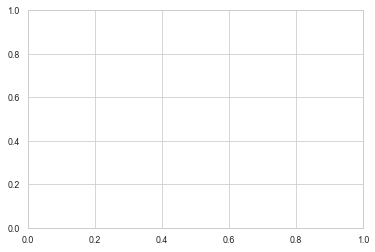

In [12]:
# Seaborn Bar plot and customization
sb.set_style("whitegrid")
sb.set_context('paper')
f, ax = plt.subplots(1, 1)

ax=sb.barplot(y='country',x='total_vaccinations_per_hundred',data=total_vacc_100,palette='viridis')
ax.set_xlabel('Doses per 100 people')
ax.set_ylabel('Countries')
ax.set_title('Top 10 countries by total vaccinations per 100 people', fontsize=12)

# Ensures that all data is displayed and saves the plot into a png file
plt.tight_layout()
plt.savefig('total_vacc_100.jpg',dpi=100)
plt.show()

In [ ]:
vaccine_data = covid_vacc[['country','vaccines']]
vaccine_data

In [ ]:
d = vaccine_data.groupby(['country','vaccines']).count().reset_index()
d

In [ ]:
d[['Vaccine1','Vaccine2','Vaccine3','Vaccine4','Vaccine5']] = d['vaccines'].str.split(',',expand = True)
d

In [ ]:
d = d.drop(columns = ['vaccines'], axis = 1)
d

In [ ]:
d1 = d[['country','Vaccine1']]
d1 = d1.rename(columns = {'Vaccine1':'vaccines'})
d1

In [ ]:
d2 = d[['country','Vaccine2']]
d2 = d2.rename(columns = {'Vaccine2':'vaccines'})
d2

In [ ]:
d3 = d[['country','Vaccine3']]
d3 = d3.rename(columns = {'Vaccine3':'vaccines'})
d3

In [ ]:
d4 = d[['country','Vaccine4']]
d4 = d.rename(columns = {'Vaccine4':'vaccines'})
d4

In [ ]:
d5 = d[['country','Vaccine5']]
d5 = d5.rename(columns = {'Vaccine5':'vaccines'})
d5

In [ ]:
vacc_data_new = pd.concat([d1,d2,d3,d5], ignore_index = True)
vacc_data_new

In [ ]:
#Top 10 vaccines given along with the number of countries in which they are given
top_10_vacc = d1.groupby(['vaccines']).count().nlargest(10,'country').reset_index()
top_10_vacc

In [ ]:
fig = px.pie(top_10_vacc, values='country', names='vaccines',
             title='Top 10 vaccines given worldwide',
              hover_data=['country'], labels={'country':'No:of countries in which they are given'})
fig.update_traces(textposition='inside')
fig.show()




In [ ]:
fig = px.choropleth(covid_vacc, locations = 'country', locationmode = 'country names', color = 'vaccines', animation_frame = 'date')
fig.update_layout(title_text = 'Countries with Vaccinations given',)
fig.show()

In [ ]:
fig = px.choropleth(total_vacc, locations = 'country',locationmode = 'country names',color = 'vaccines',
                   title = 'Vaccines used for each country',hover_data= ['total_vaccinations'],
                   color_discrete_map=dict(zip(total_vacc['vaccines'], px.colors.sequential.Viridis)),
                   labels={'vaccines': 'Name of vaccine', 'country': 'Country', 'total_vaccinations': 'Number of vaccinations'})
fig.update_geos(
    visible=True, 
    resolution=50,
    showcountries=True, 
    countrycolor="darkgrey"
    )
fig.update_layout(
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='miller'
    ),
)
fig.show()

In [ ]:
check_data = covid_vacc.drop(covid_vacc[covid_vacc.people_vaccinated.isna()].index)

In [ ]:
plt.subplots(figsize=(10, 10))
sb.heatmap(check_data.corr(), annot=True, square=True)
plt.show()